1.Определить, есть ли связь между кол-ом подписчиков у каждого пользователя и кол-ом его постов 
2.Построить модель линейной регрессии для страны с самым большим количество твитов и топ-3 пользователей из этой страны

3.Найти коэффициенты линейной регрессии с помощью формул для парной регрессии. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации. Оцените построенное уравнение регрессии с помощью F-критерия Фишера. 
4.Визуализировать полученные данные 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

import seaborn as sns
import collections as col

plt.style.use('seaborn-whitegrid')

In [4]:
df = pd.read_csv('covid19_tweets.csv')

In [5]:
df.head(2)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False


In [6]:
#если связь между кол-ом подписчиков и кол-ом твитов

#всего твитов каждого пользователя
tw_num = df['user_name'].value_counts()
user_name = np.array(tw_num.index)
u_tw = tw_num.values

tw_num = list(zip(user_name, u_tw))

u_tw_num = pd.DataFrame(tw_num, columns = ['user_name','u_tw']) 
u_tw_num.index.name='user_id'
u_tw_num.reset_index(inplace=True)


In [7]:
u_tw_num.head()

,user_id,user_name,u_tw
0,0,GlobalPandemic.NET,679
1,1,Coronavirus Updates,625
2,2,covidnews.ch,402
3,3,Open Letters,390
4,4,Blood Donors India,282


In [9]:
#среднее кол-во подписчиков у каждого пользователя
df2 = pd.merge(u_tw_num, df)

data = df2[['user_id','user_name','u_tw','user_followers']]

flws_m= []

u=0
for u in u_tw_num['user_id']:
    val = data[data.user_id==u]
    u_f=val['user_followers'].mean()
    flws_m.append(u_f)
    u += 1
    
u_tw_num['flws_m']=flws_m
u_tw_num['flws_m']=u_tw_num['flws_m'].round(decimals=2)

In [10]:
u_tw_num.head(3)

,user_id,user_name,u_tw,flws_m
0,0,GlobalPandemic.NET,679,26100.55
1,1,Coronavirus Updates,625,484.10
2,2,covidnews.ch,402,360.55


In [11]:
u_tw_num[['u_tw','flws_m']].corr()

,u_tw,flws_m
u_tw,1.00000,0.11838
flws_m,0.11838,1.00000


**нет зависимости между средним кол-ом подписчиков и кол-вом твитов**

In [15]:
df3= df2.copy()

In [17]:
#визуализировать кол-во твитов 

df3['date'] = pd.to_datetime(df3.date)
df3['user_created']=pd.to_datetime(df3.date)
df3['Day']= df3.date.dt.date
df3['u_cr_day'] = df3.user_created.dt.date

df3['Year'] = df3.date.dt.year
df3['u_year'] = df3.user_created.dt.year
df3['tw_day']= df3.date.dt.day
df3['tw_month']= df3.date.dt.month

In [18]:
df4 = df3.drop(columns = ['user_description', 'user_created', 'date', 'user_verified', 'user_favourites', 'hashtags', 'is_retweet', 'text'])

In [19]:
df4.head(2)

,user_id,user_name,u_tw,user_location,user_followers,user_friends,source,Day,u_cr_day,Year,u_year,tw_day,tw_month
0,0,GlobalPandemic.NET,679,WORLDWIDE,26108,26003,GlobalPandemic.NET,2020-07-25,2020-07-25,2020,2020,25,7
1,0,GlobalPandemic.NET,679,WORLDWIDE,26108,26003,GlobalPandemic.NET,2020-07-25,2020-07-25,2020,2020,25,7


In [20]:
tw_day = df3['Day'].value_counts()
day = tw_day.index
twts = tw_day.values
twts_day_num = list(zip(day, twts))

twts_day_num = pd.DataFrame(twts_day_num, columns = ['day', 'tweets'])
twts_day_num.sort_values(by=['day'], inplace=True)

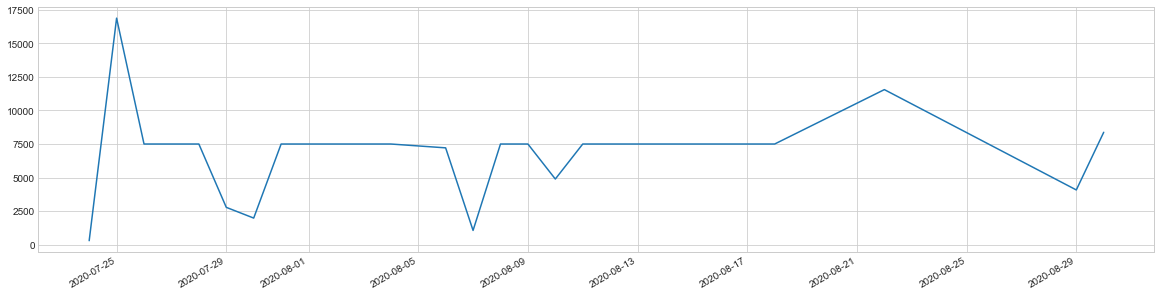

In [22]:
days = twts_day_num['day']
tweets_d = twts_day_num['tweets']

fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
ax.plot(days, tweets_d)


fig.autofmt_xdate()

plt.show()

In [25]:
location = df4['user_location'].value_counts()

user_location = np.array(location.index)
loc_num = location.values

tw_location = list(zip(user_location, loc_num))

location = pd.DataFrame(tw_location, columns=['user_location', 'loc_num'])

location.index.name='location_id'
location.reset_index(inplace=True)

In [26]:
location.head(2)

,location_id,user_location,loc_num
0,0,India,3741
1,1,United States,2455


In [31]:
df5 = pd.merge(location, df4)

In [32]:
df5 = df5.drop(columns = ['user_location', 'user_name', 'source'])

In [33]:
df5.head(2)

,location_id,loc_num,user_id,u_tw,user_followers,user_friends,Day,u_cr_day,Year,u_year,tw_day,tw_month
0,0,3741,5,280,7647627,126,2020-07-25,2020-07-25,2020,2020,25,7
1,0,3741,5,280,7647629,126,2020-07-25,2020-07-25,2020,2020,25,7


In [34]:
#есть ли завивисмость между кол-ом всех постов в стране и кол-ом постов пользователей
df6 = df5[['location_id', 'user_id', 'u_tw', 'Day']].set_index('location_id')

In [35]:
df6.head()

,user_id,u_tw,Day
location_id,,,
0,5,280,2020-07-25
0,5,280,2020-07-25
0,5,280,2020-07-25
0,5,280,2020-07-25
0,5,280,2020-07-25


In [36]:
#топ 3 пользователя из страны с самым большим кол-ом твитов
all_users_l1 = pd.read_pickle('all_users_l1.pkl')

In [37]:
all_users_l1.head()

,day,tweets_u1,tweets_u2,tweets_u3,tweets_l1
0,2020-07-26,37.0,14.0,5.0,204
1,2020-07-25,31.0,29.0,33.0,452
2,2020-08-16,27.0,11.0,2.0,179
3,2020-08-14,23.0,15.0,5.0,176
4,2020-08-30,23.0,12.0,1.0,242


In [180]:
u1 = all_users_l1['tweets_u1']
u2 = all_users_l1['tweets_u2']
u3 = all_users_l1['tweets_u3']
all_tw = all_users_l1['tweets_l1']

In [157]:
all_users_l1[['tweets_u1','tweets_u2','tweets_u3','tweets_l1']].corr()

,tweets_u1,tweets_u2,tweets_u3,tweets_l1
tweets_u1,1.000000,0.705786,0.506972,0.751170
tweets_u2,0.705786,1.000000,0.739456,0.857257
tweets_u3,0.506972,0.739456,1.000000,0.814789
tweets_l1,0.751170,0.857257,0.814789,1.000000


In [40]:
b1 = np.cov(u1, all_tw, ddof=1)[0,1]/np.var(u1, ddof=1)
b2 = np.cov(u2, all_tw, ddof=1)[0,1]/np.var(u2, ddof=1)
b3 = np.cov(u3, all_tw, ddof=1)[0,1]/np.var(u3, ddof=1)

In [41]:
b01 = all_tw.mean() - b1 * u1.mean()
ox1 = u1
oy1 = b01 + b1 * ox1 

b02 = all_tw.mean() - b2 * u2.mean()
ox2 =u2
oy2 = b02 + b2 * ox2 

b03 = all_tw.mean() - b3 * u3.mean()
ox3 =u3
oy3 = b03 + b3 * ox3 

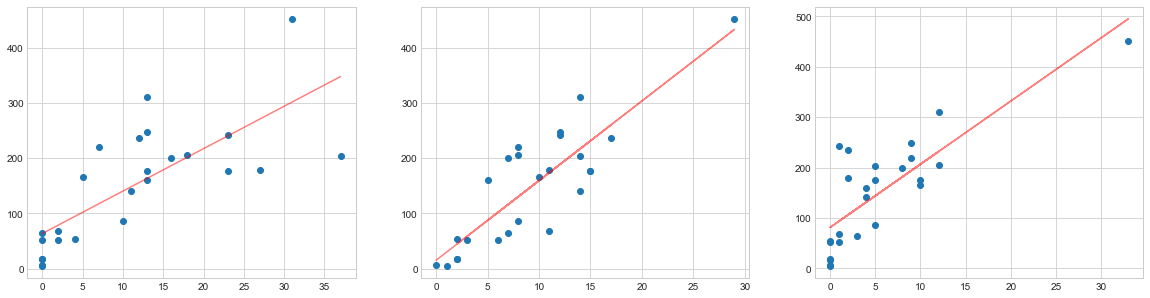

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 5)

ax1.scatter(u1, all_tw)
ax1.plot(ox1, oy1, color='red', alpha=0.5)

ax2.scatter(u2, all_tw)
ax2.plot(ox2, oy2, color='red', alpha=0.5)

ax3.scatter(u3, all_tw)
ax3.plot(ox3, oy3, color='red', alpha=0.5)

plt.show()

In [199]:
#предсказать кол-во твитов в стране по топ пользователям
x2 = all_users_l1[['tweets_u1', 'tweets_u2', 'tweets_u3']].values

y2 = all_users_l1['tweets_l1'].values.reshape(-1, 1)


In [200]:
ones = np.ones((x2.shape[0], 1))
x2  = np.hstack((ones, x2))

In [204]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

18244084421.999996

In [205]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[[27.36527822]
 [ 3.09924778]
 [ 5.72040384]
 [ 6.29576892]]


In [206]:
x2.dot(b).mean(), y2.mean()

(149.63999999999996, 149.64)

In [207]:
z2 = x2.dot(b)

print(f'real:{y2[:5]}')
print(f'pred:{z2[:5]}')

real:[[204]
 [452]
 [179]
 [176]
 [242]]
pred:[[253.60194431]
 [497.09404484]
 [186.56094827]
 [215.93287925]
 [173.58859208]]


In [208]:
R= 1 - ((z2 - y2).var()/y2.var())
R

0.8532194269189204

In [195]:
def mean_approximation_error(y_real: np.ndarray, y_pred: np.ndarray) -> float:
    """Средняя ошибка аппроксимации.
    """
    
    return np.abs((y_real - y_pred) / y_real).mean()

In [209]:
mean_approximation_error(y2, z2)

0.6482853204566801

In [210]:
u1.shape

(25,)

In [211]:
k1 = 3
k2 = 21

F1 = (R / k1) / ((1 - R) / k2)
F1

40.6902348387296

In [212]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

3.072466986396876

In [213]:
F1>F_crit

True